## Overview
A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction.

## Guidelines
You can make 20 submissions per day. Once you submit your results, you will get a roc-auc score computed based on 40% of the test data. This score will position you somewhere on the leaderboard. Once the competition ends, you will see the final accuracy computed based on 100% of the test data.

* Understand the Problem Statement and Import the Packages and Datasets
* Perform EDA (Exploratory Data Analysis) – Understanding the Datasets. Explore Train and Test Data and get to know what each Column / Feature denotes. Check for Imbalance of Target Column in Datasets
* (Check for Duplicate Rows from Train Data
* Fill/Impute Missing Values – Continuous – Mean/Median/Any Specific Value | Categorical – Others/ForwardFill/BackFill
* Feature Engineering – Feature Selection – Selection of Most Important Existing Features | Feature Creation or Binning  – Creation of New Feature(s) from the Existing Feature(s)
* Split Train Data into Features(Independent Variables) | Target(Dependent Variable)
* Data Encoding – Label Encoding, One-Hot Encoding | Data Scaling – MinMaxScaler, StandardScaler, RobustScaler
* Create Baseline Machine Learning Model for the Binary Classification problem
* Ensemble with Voting Classifier to Improve the Evaluation Metric “F1-Score” and Predict Target “churned”
* Result Submission, Check Leaderboard, and Improve “Accuracy-Score”

In [2]:
#import modules 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
pd.set_option('MAX_COLUMNS', None)

# Warning Libraries :
import warnings
warnings.filterwarnings("ignore")

In [4]:
from google.colab import files
uploaded = files.upload()
#drive.mount("/content/drive")

Saving SampleSubmission.csv to SampleSubmission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [4]:
df = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_sub = pd.read_csv("SampleSubmission.csv")

In [5]:
df.head(3)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,719051733,0,63,M,0,College,Single,$60K - $80K,Blue,51,4,2,1,2706.0,889,1817.0,0.730,5047,64,0.882,0.329
1,719324658,0,27,M,0,College,Unknown,$80K - $120K,Silver,19,1,1,3,34516.0,1131,33385.0,0.715,14716,112,0.750,0.033
2,799475658,0,51,F,3,Uneducated,Married,Less than $40K,Blue,45,3,3,3,2238.0,1300,938.0,1.071,4508,79,0.756,0.581


In [6]:
df.tail(3)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
8098,794632308,0,40,M,4,Graduate,Married,$60K - $80K,Silver,25,5,3,2,28822.0,2517,26305.0,0.492,1504,35,0.296,0.087
8099,710153583,1,30,F,0,Uneducated,Married,Less than $40K,Blue,13,3,1,3,6075.0,0,6075.0,0.923,9242,63,0.909,0.000
8100,779916408,0,39,F,4,Graduate,Single,Unknown,Blue,23,1,3,2,1811.0,0,1811.0,0.835,4934,70,0.628,0.000


In [7]:
df.shape, test.shape

((8101, 21), (2026, 20))

The train data set has a total of 8101 rows and 21 features. The depenedent variable is Attrition_Flag, with 20 dependent features.


* Attrition_Flag (0) signifies customers who have not churned 
* Attrition_Flag (1) signifies customer who have churned (customers who have left the business)

Since the task requires us to pick a value (churn/no churn), the task qualifies as a classification problem.


In [8]:
pd.DataFrame({'missing':df.isna().sum(),
             'unicos':df.nunique(),
             'typs': df.dtypes})  #With no null values we would investigate the unique values in each column

,missing,unicos,typs
CLIENTNUM,0,8101,int64
Attrition_Flag,0,2,int64
Customer_Age,0,45,int64
Gender,0,2,object
Dependent_count,0,6,int64
Education_Level,0,7,object
Marital_Status,0,4,object
Income_Category,0,6,object
Card_Category,0,4,object
Months_on_book,0,44,int64


In [9]:
for cols in df.columns:
  if df[cols].dtype == "object":
    df[cols] = df[cols].astype("category")
  else:
    df[cols] = df[cols]


for cols in test.columns:
  if test[cols].dtype == "object":
    test[cols] = test[cols].astype("category")
  else:
    test[cols] = test[cols]


In [10]:
df["Attrition_Flag"] = df["Attrition_Flag"].astype("category")

In [11]:
  df.dtypes 

CLIENTNUM                      int64
Attrition_Flag              category
Customer_Age                   int64
Gender                      category
Dependent_count                int64
Education_Level             category
Marital_Status              category
Income_Category             category
Card_Category               category
Months_on_book                 int64
Total_Relationship_Count       int64
Months_Inactive_12_mon         int64
Contacts_Count_12_mon          int64
Credit_Limit                 float64
Total_Revolving_Bal            int64
Avg_Open_To_Buy              float64
Total_Amt_Chng_Q4_Q1         float64
Total_Trans_Amt                int64
Total_Trans_Ct                 int64
Total_Ct_Chng_Q4_Q1          float64
Avg_Utilization_Ratio        float64
dtype: object

In [12]:
cat_cols = df.select_dtypes(["category"]).columns
df[cat_cols] = df[cat_cols].apply(lambda x: x.cat.codes)

cat_colst = test.select_dtypes(["category"]).columns
test[cat_colst] = test[cat_colst].apply(lambda y: y.cat.codes)



test.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,715517733,46,0,3,3,2,4,3,39,1,0,4,13092.0,1962,11130.0,0.686,936,25,0.250,0.150
1,752648883,49,0,2,0,2,4,0,41,6,3,1,2018.0,1366,652.0,0.964,4842,69,0.500,0.677
2,718627458,43,0,3,1,1,5,0,38,3,4,2,1947.0,0,1947.0,0.838,2119,52,1.000,0.000
3,713370033,53,0,0,2,2,4,0,40,4,1,4,1438.3,0,1438.3,0.503,2014,53,0.472,0.000
4,797218233,51,0,2,6,2,4,0,45,5,1,0,1757.0,0,1757.0,0.533,4550,82,0.547,0.000


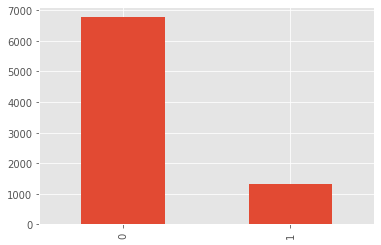

In [13]:
#The disparity between the churned and not-churned is large therefore we would normalize the feature
df['Attrition_Flag'].value_counts().plot(kind='bar',stacked=True)

In [14]:
#Import Scikit Learn module 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [15]:
X= df.drop("Attrition_Flag" ,axis=1).values
y= df["Attrition_Flag"].values 


In [16]:
# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, 
test_size = 0.2)

In [17]:
Ss = StandardScaler()
X_train = Ss.fit_transform(X_train)
X_test = Ss.transform(X_test)
rescaled_test = Ss.transform(test)


In [18]:
def train_model(model):
    
    model.fit(X_train, y_train)
    train_score, val_score = roc_auc_score(y_train, model.predict(X_train)), roc_auc_score(y_test, model.predict(X_test))
    print('train ROC is: {}, test ROC is: {}'.format(train_score, val_score))
    return model

In [19]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
DTC.fit(X_train,y_train)
y_pred = DTC.predict(X_test)

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

rfc_cv_score = cross_val_score(DTC, X, y, cv=20, scoring ="roc_auc")
print("---Confusion Matrix---")
print(confusion_matrix(y_test, y_pred))

---Confusion Matrix---
[[1321   43]
 [  46  211]]


In [21]:
from sklearn.neighbors import KNeighborsClassifier
# Create a k-NN classifier with 6 neighbors: knn
knn = KNeighborsClassifier(n_neighbors = 6)
trained_model = train_model(knn)

train ROC is: 0.751838736742465, test ROC is: 0.7064510423679496


In [22]:
from sklearn.metrics import roc_auc_score

train_score = roc_auc_score(y_test, DTC.predict(X_test))

print('train ROC is: {}'.format(train_score))

train ROC is: 0.894743373232767


In [23]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [24]:
lr = LogisticRegression(random_state = 42, max_iter = 100)

In [25]:
trained_model = train_model(lr)

train ROC is: 0.7856769141406535, test ROC is: 0.7490543377797049


In [26]:
"""from sklearn.naive_bayes import MultinomialNB
model_cv = MultinomialNB()
trained_model = train_model(model_cv)"""

'from sklearn.naive_bayes import MultinomialNB\nmodel_cv = MultinomialNB()\ntrained_model = train_model(model_cv)'

In [31]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state = 1,
                                  n_estimators = 750,
                                  max_depth = 15, 
                                  min_samples_split = 5,  min_samples_leaf = 1)

In [32]:
trained_model = train_model(model)

train ROC is: 0.9928382419379129, test ROC is: 0.9262954003446033


In [33]:
preds = model.predict(rescaled_test)

In [34]:
sample_sub.Attrition_Flag = preds


In [35]:
sample_sub.head(3)

,CLIENTNUM,Attrition_Flag
0,715517733,1
1,752648883,0
2,718627458,1


In [36]:
sample_sub.to_csv('Business_Churn1.csv', index = False)